# Feature Extraction and Dimensionality Reduction

Explore model outputs from feature extraction and perform dimensionality reduction using UMAP to identify whether there is any observed correlation in the extracted features.

In [1]:
import sys
sys.path.append("..")

from astropy.io import fits
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib.get_config import get_config
cfg = get_config('../config/config.yaml')

logdir_expf = lambda exp_dir: Path(cfg['data_dir'], 'logs', exp_dir)

Load config file >> ../config/config.yaml


## Plot Functions

In [2]:
import umap
import matplotlib as mpl

random_state = 42

def plot_umapembedding(mapper, label, ndim0=0, ndim1=1, labelname='', save_plotname=False):
    """Plot 2D embedding of UMAP"""
    if not isinstance(mapper, np.ndarray):
        mapper = mapper.embedding_
    fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(box_aspect=1))
    cmap = mpl.colors.ListedColormap(mpl.colormaps['BuPu'](np.linspace(0.05, 1., 256)))
    scatter = ax.scatter(mapper[:, ndim0], mapper[:, ndim1], s=1, c=label, cmap=cmap, alpha=0.8, rasterized=True)
    cbar = fig.colorbar(scatter, ax=ax, fraction=0.0476, pad=0.)
    cbar.set_label(rf"{labelname}")
    ax.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    ax.set_xlabel('' if ndim0==0 else f"component {ndim0}")
    ax.set_ylabel('' if ndim1==1 else f"component {ndim1}")
    if save_plotname: fig.savefig(save_plotname if isinstance(save_plotname, str) else 'plots/umap2d.pdf', bbox_inches='tight')
    plt.show()



def plot_loss(df_losses):
    """Plot loss"""
    plt.figure()
    for col in df_losses:
        plt.plot(df_losses[col], label=col)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


/Users/sukyee/opt/miniconda3/envs/mltorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Supervised Encoder Model

- Input flux: flux_line
- NN model: Dense with list_linear=[64, 64, 8]
- Loss: MSE

In [5]:
logdir_exp = logdir_expf('20230422/002629_LOGMBH_HB_DenseEncoder')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(random_state=42, verbose=True)
Mon Apr 24 21:46:25 2023 Construct fuzzy simplicial set
Mon Apr 24 21:46:25 2023 Finding Nearest Neighbors
Mon Apr 24 21:46:25 2023 Building RP forest with 10 trees
Mon Apr 24 21:46:25 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Mon Apr 24 21:46:25 2023 Finished Nearest Neighbor Search
Mon Apr 24 21:46:25 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:08]


Mon Apr 24 21:46:34 2023 Finished embedding


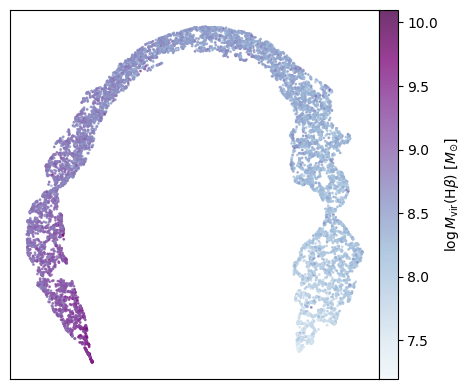

In [6]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'],
                   labelname=r'$\log M_{\mathrm{vir}}(\mathrm{H}\beta)\ [M_{\odot}]$',
                   save_plotname='plots/umap2d_hbeta.pdf')
# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


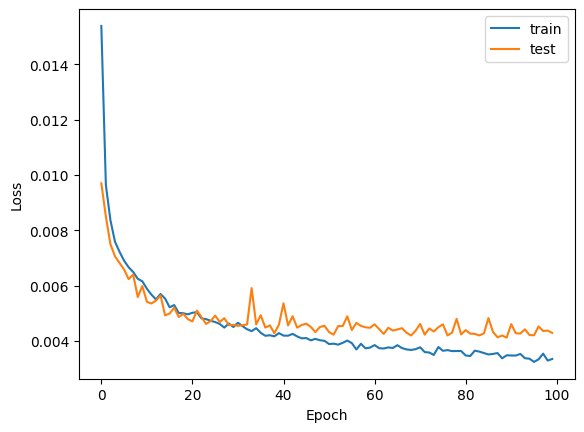

In [7]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))

In [8]:
logdir_exp = logdir_expf('20230422/030635_LOGMBH_MGII_DenseEncoder')

datasplit_idx = pd.read_pickle(Path(logdir_exp, 'datasplitidx.pkl'))
df_features = pd.read_pickle(Path(logdir_exp, 'features.pkl'))
yscaler = pd.read_pickle(Path(logdir_exp, 'yscaler.pkl'))

feature_keys = [k for k in df_features.columns if isinstance(k, int)]
dffeatures_train = df_features.loc[datasplit_idx['train']]
dffeatures_test = df_features.loc[datasplit_idx['test']]

UMAP(random_state=42, verbose=True)
Mon Apr 24 21:46:35 2023 Construct fuzzy simplicial set
Mon Apr 24 21:46:35 2023 Finding Nearest Neighbors
Mon Apr 24 21:46:35 2023 Building RP forest with 10 trees
Mon Apr 24 21:46:35 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Mon Apr 24 21:46:35 2023 Finished Nearest Neighbor Search
Mon Apr 24 21:46:35 2023 Construct embedding


Epochs completed: 100%| ██████████████████████████████████████████████████████████████████ 500/500 [00:08]


Mon Apr 24 21:46:44 2023 Finished embedding


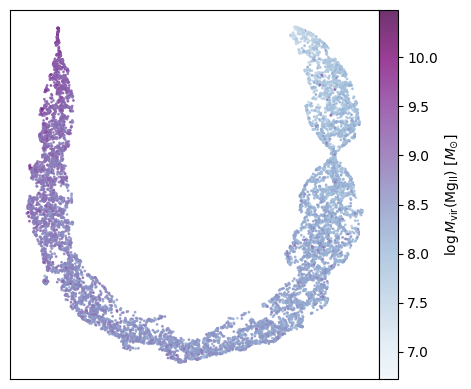

In [9]:
# Plot 2D embeddings of extracted features
mapper = umap.UMAP(n_components=2, random_state=random_state, verbose=True).fit(dffeatures_train[feature_keys].to_numpy())
plot_umapembedding(mapper, label=dffeatures_train['label'],
                   labelname=r'$\log M_{\mathrm{vir}}(\mathrm{Mg}_{\mathrm{II}})\ [M_{\odot}]$',
                   save_plotname='plots/umap2d_mgii.pdf')

# Perform on validation set
# test_embedding = mapper.transform(dffeatures_test[feature_keys])
# plot_umapembedding(test_embedding, label=dffeatures_test['label'])


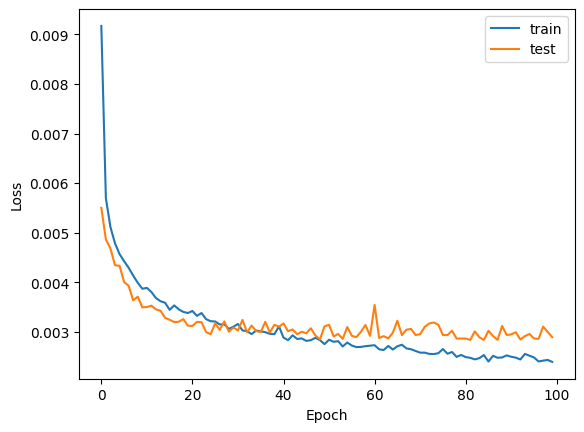

In [10]:
plot_loss(pd.read_pickle(Path(logdir_exp, 'loss.pkl')))